In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer
from sklearn.metrics import *

In [444]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\heart_disease_uci.csv")

In [445]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [446]:
df['num'].replace(2, 1,inplace=True)
df['num'].replace(3, 1,inplace=True)
df['num'].replace(4, 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5224\3730419716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num'].replace(2, 1,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5224\3730419716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [447]:
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [448]:
cat = ['slope','exang','restecg','fbs']
num = ['oldpeak','thalch','chol']

In [449]:
si1 = SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='most_frequent')

In [450]:
df[num] = si1.fit_transform(df[num])

In [451]:
df[cat]= si2.fit_transform(df[cat])

In [452]:
df.drop(columns=['ca','thal'],inplace=True)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 100.8+ KB


In [454]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

In [455]:
le_cat = ['sex','dataset','cp','fbs','restecg','exang','slope']

In [456]:
df[le_cat] = oe.fit_transform(df[le_cat])

In [457]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0
1,2,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,1
2,3,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,1
3,4,37,1.0,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0
4,5,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0


In [458]:
df.drop(columns=['id'],inplace=True)

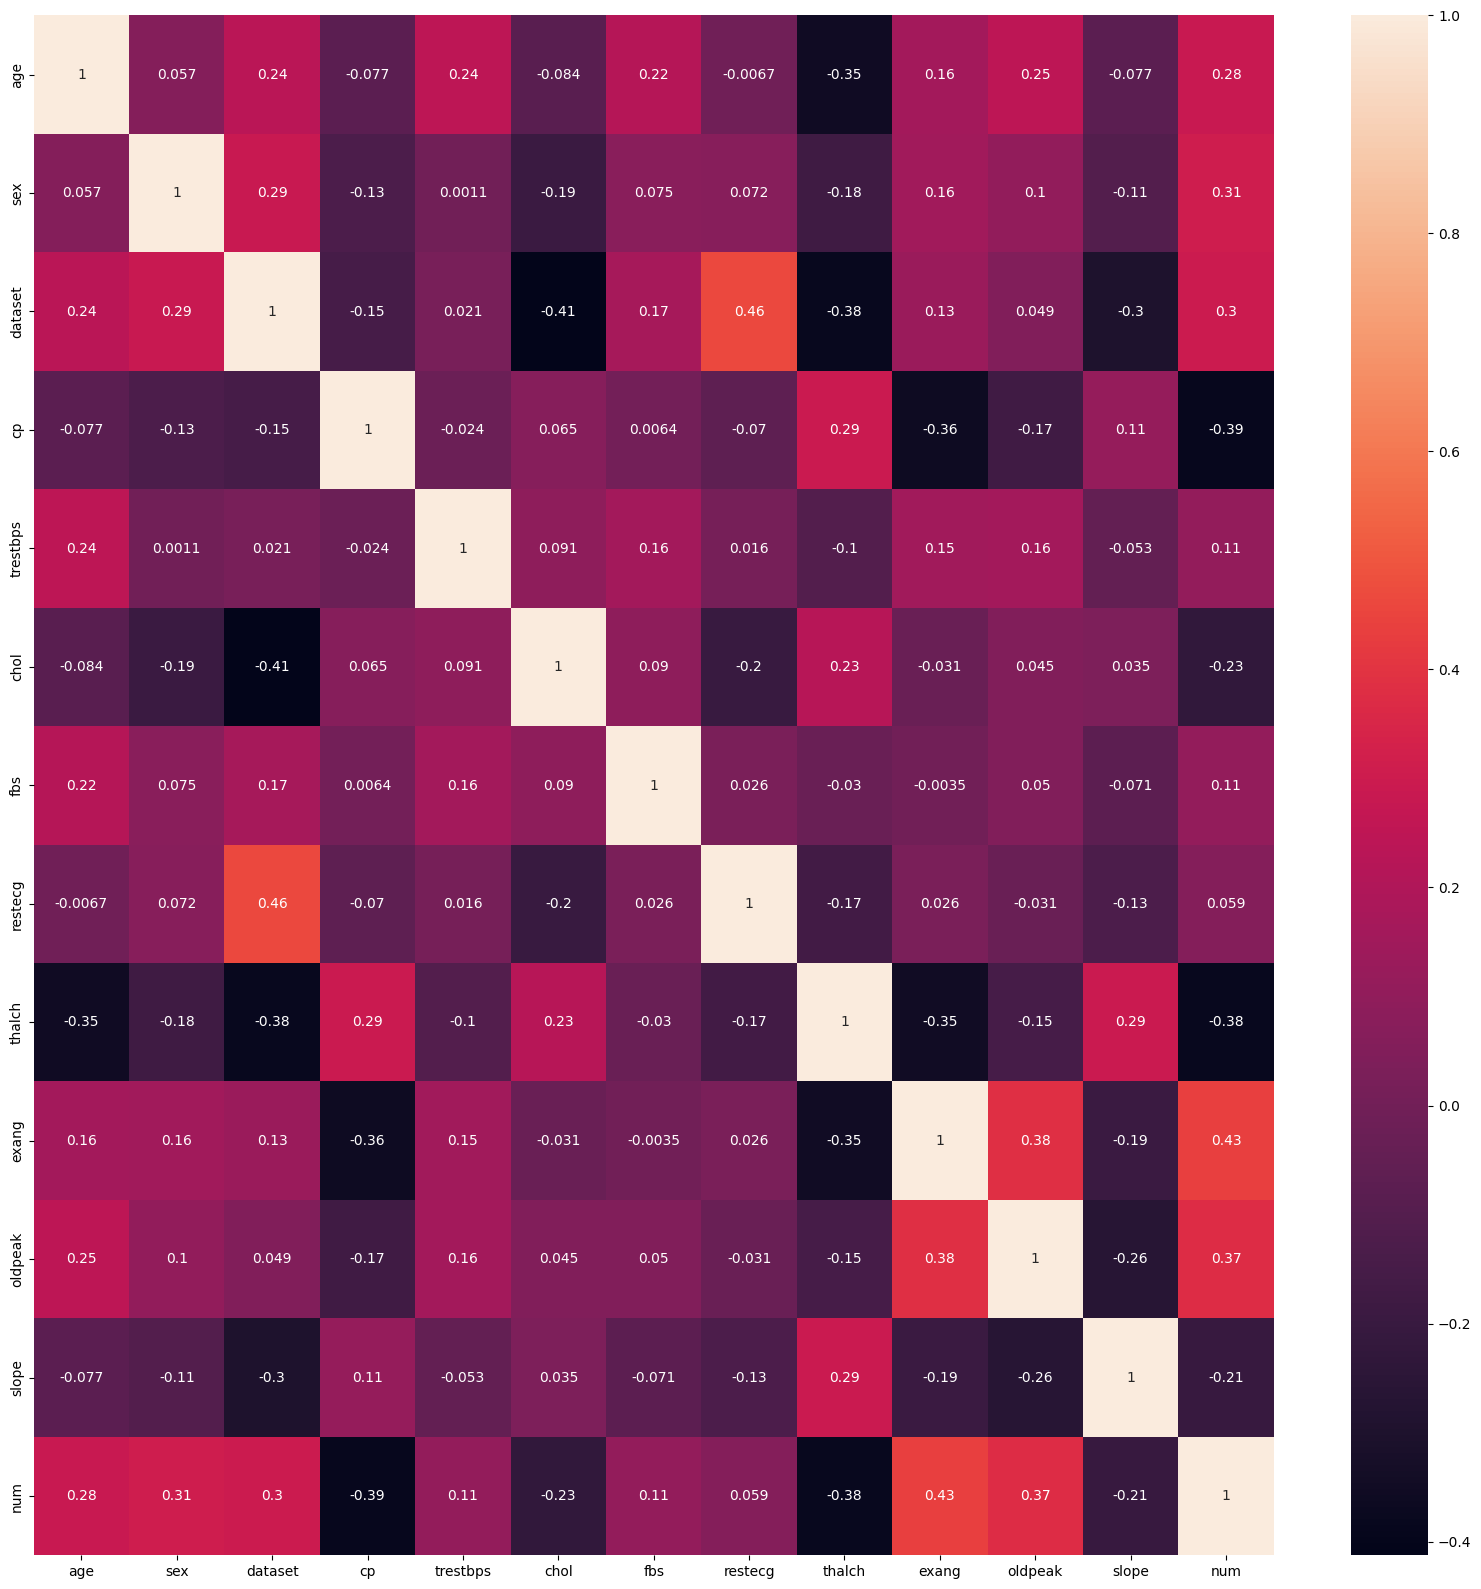

In [459]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [460]:
# for col in df.columns:
#     plt.figure(figsize=(6,4))

#     if np.issubdtype(df[col].dtype, np.number):
#         sns.boxplot(x=df[col])
#     else:
#         sns.boxplot(x=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.tight_layout()
#     plt.show()

In [461]:
cols_to_cap = ['trestbps','chol','oldpeak']

In [462]:
for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"{col}: lower={lower_limit}, upper={upper_limit}")

    df[col] = df[col].clip(lower_limit, upper_limit)

trestbps: lower=90.0, upper=170.0
chol: lower=43.875, upper=400.875
oldpeak: lower=-2.25, upper=3.75


In [463]:
# for col in df.columns:
#     plt.figure(figsize=(6,4))

#     if np.issubdtype(df[col].dtype, np.number):
#         sns.boxplot(x=df[col])
#     else:
#         sns.boxplot(x=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.tight_layout()
#     plt.show()

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['num']),df['num'],test_size=0.2,random_state=42,stratify=df['num'])

In [466]:
skew_values = x_train.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print(skew_values)

fbs         2.000775
oldpeak     0.852761
cp          0.765642
exang       0.535511
dataset     0.432848
trestbps    0.340870
slope       0.185828
restecg     0.008047
age        -0.175729
thalch     -0.220741
chol       -0.545556
sex        -1.382854
dtype: float64


In [467]:
from sklearn.preprocessing import StandardScaler

In [468]:
sc = StandardScaler()

In [469]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [470]:
from sklearn.tree import DecisionTreeClassifier

In [471]:
dtc = DecisionTreeClassifier()

In [472]:
dtc.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [473]:
y_pred1=dtc.predict(x_train_sc)

print('accuracy: ',accuracy_score(y_train, y_pred1))

accuracy:  1.0


In [474]:
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [475]:
y_pred = dtc.predict(x_test_sc)

In [476]:
from sklearn.metrics import classification_report

print('accuracy: ',accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))


accuracy:  0.7554347826086957

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        82
           1       0.78      0.77      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



In [477]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [4, 6, 8, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced", random_state=42),
    param_grid,
    scoring="recall_weighted",
    cv=5
)

grid.fit(x_train_sc, y_train)

best_dtc = grid.best_estimator_
print(grid.best_params_)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [478]:
from sklearn.metrics import classification_report

y_pred = best_dtc.predict(x_test_sc)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        82
           1       0.86      0.84      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [479]:
print("Train acc:", accuracy_score(y_train, dtc.predict(x_train_sc)))
print("Test acc :", accuracy_score(y_test, dtc.predict(x_test_sc)))
print("Hyper Test acc :", accuracy_score(y_test,best_dtc.predict(x_test_sc)))


Train acc: 1.0
Test acc : 0.7554347826086957
Hyper Test acc : 0.8369565217391305
